<a href="https://colab.research.google.com/github/Harshcs2002/Task2-Prediction-Using-Unsupervised-ML/blob/main/SparkTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 2 - Prediction Using Unsupervised ML

From the given iris dataset predict the optimum number of clusters and represent it visually.

## Author - Harsh Jaiswal

#### importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

#### Reading the Dataset 

In [4]:
df=pd.read_csv('/content/Irisdata.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### finding optimal number of cluster 

In [15]:
x = df.iloc[:, [1,2,3]].values

import warnings
Error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)

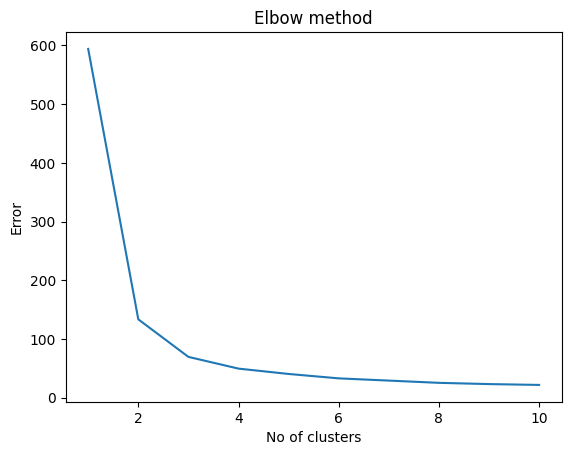

In [16]:
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

using elbow method we can choose optimal number of cluster to be 3

####  Creating the kmeans classifier

In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#### Visualization

In [18]:
def plot_clusters(x, y_kmeans, kmeans):
    # Define the colors for each cluster
    colors = ['red', 'blue', 'green']

    # Plotting the data points for each cluster
    for i in range(kmeans.n_clusters):
        plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1], s=100, c=colors[i],
                    label=f'Cluster {i}')

    # Plotting the centroids of the clusters
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=100, c='yellow', label='Centroids')

    plt.legend()
    plt.show()

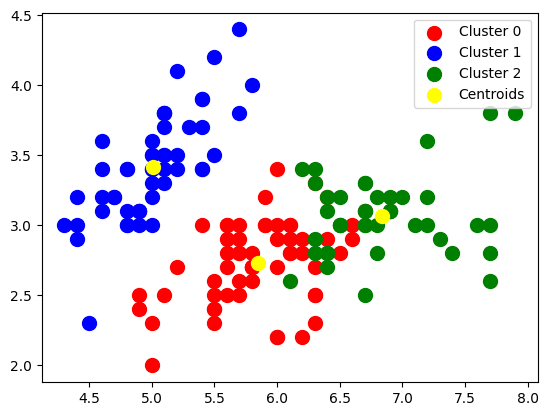

In [19]:
plot_clusters(x, y_kmeans, kmeans)

# Thank You :)